# Cognifyz Data Analyst Internship Task

# Level 1

# Task 1 : Top Cuisines

In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Suraj Jagtap\Desktop\Dataset  (1).csv")
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
df["Cuisines"].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [4]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

Top three cuisines:
North Indian: 3960
Chinese: 2735
Fast Food: 1986


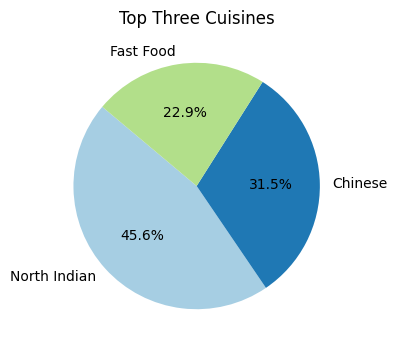

In [5]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


# Drop missing values in the 'Cuisines' column
df = df.dropna(subset=['Cuisines'])
df['Cuisines'] = df['Cuisines'].astype(str)

# Split the 'Cuisines' column into lists of cuisines
df['Cuisines'] = df['Cuisines'].str.split(', ')

# Flatten the list of all cuisines
all_cuisines = [cuisine for sublist in df['Cuisines'] for cuisine in sublist]

# Count occurrences of each cuisine
cuisine_count = Counter(all_cuisines)

# Get the top three cuisines
top_three_cuisines = cuisine_count.most_common(3)

# Output the result
print("Top three cuisines:")
for cuisine, count in top_three_cuisines:
    print(f"{cuisine}: {count}")

# Prepare data for the pie chart
cuisines = [cuisine for cuisine, count in top_three_cuisines]
counts = [count for cuisine, count in top_three_cuisines]

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=cuisines, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Top Three Cuisines")
plt.show()


# Task 2 : Task: City Analysis

### Identify the city with the highest number of restaurants in the dataset.

In [6]:
#  Group by city and count the number of restaurants in each city
city_counts = df['City'].value_counts()

# Identify the city with the highest number of restaurants
city_with_max_restaurants = city_counts.idxmax()
max_restaurant_count = city_counts.max()

# Output the result
print(f"The city with the highest number of restaurants is {city_with_max_restaurants} with {max_restaurant_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


### Calculate the average rating for restaurants in each city.

In [7]:
#  Group by city and calculate the average rating
average_ratings = df.groupby('City')['Aggregate rating'].mean()

# Output the result
print("Average rating for restaurants in each city:")
print(round(average_ratings,2))

Average rating for restaurants in each city:
City
Abu Dhabi          4.30
Agra               3.96
Ahmedabad          4.16
Albany             3.55
Allahabad          3.40
                   ... 
Weirton            3.90
Wellington City    4.25
Winchester Bay     3.20
Yorkton            3.30
��stanbul          4.29
Name: Aggregate rating, Length: 140, dtype: float64


### Determine the city with the highest average rating.


In [8]:
# Group by city and calculate the average rating
average_ratings = df.groupby('City')['Aggregate rating'].mean()

# Identify the city with the highest average rating
city_with_highest_avg_rating = average_ratings.idxmax()
highest_avg_rating = average_ratings.max()

# Output the result
print(f"The city with the highest average rating is {city_with_highest_avg_rating} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


# Task 3 : Price Range Distribution

### Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

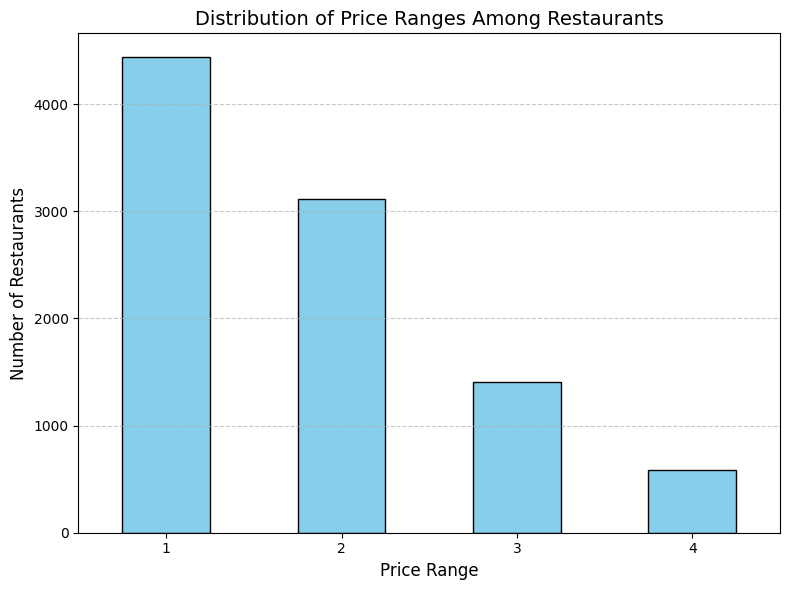

In [9]:
import matplotlib.pyplot as plt
# Group the data by 'Price range' and count occurrences
price_range_counts = df['Price range'].value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Price Range", fontsize=12)
plt.ylabel("Number of Restaurants", fontsize=12)
plt.title("Distribution of Price Ranges Among Restaurants", fontsize=14)
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


## Calculate the percentage of restaurants in each price range category.

Percentage of restaurants in each price range category:
Price range
1    46.51
2    32.62
3    14.72
4     6.14
Name: count, dtype: float64


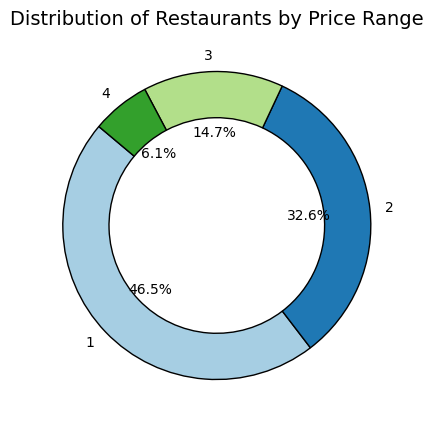

In [10]:
# Count the number of restaurants in each price range
price_range_counts = df['Price range'].value_counts()

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants in each price range
price_range_percentages = (price_range_counts / total_restaurants) * 100

# Output the result
print("Percentage of restaurants in each price range category:")
print(round(price_range_percentages, 2))

# Plot a Donut Chart
fig, ax = plt.subplots(figsize=(5, 5))

ax.pie(price_range_percentages, labels=price_range_percentages.index, autopct='%1.1f%%', startangle=140, 
       colors=plt.cm.Paired.colors, wedgeprops={'width': 0.3, 'edgecolor': 'black'})

# Add a title
plt.title("Distribution of Restaurants by Price Range", fontsize=14)

# Show the plot
plt.show()


 # Task 4 : Online Delivery

## Determine the percentage of restaurants that offer online delivery.

In [11]:
#  Convert the 'Online_Delivery' column to boolean
df['Has Online delivery'] = df['Has Online delivery'].map({'Yes': True, 'No': False})

#  Count the number of restaurants that offer online delivery
online_delivery_count = df['Has Online delivery'].sum()

# Calculate the total number of restaurants
total_restaurants = len(df)

# Calculate the percentage of restaurants offering online delivery
percentage_online_delivery = (online_delivery_count / total_restaurants) * 100

# Output the result
print(f"The percentage of restaurants that offer online delivery is {percentage_online_delivery:.2f}%.")

The percentage of restaurants that offer online delivery is 25.69%.


## Compare the average ratings of restaurants with and without online delivery.

Average rating for restaurants with online delivery: 3.25
Average rating for restaurants without online delivery: 2.46


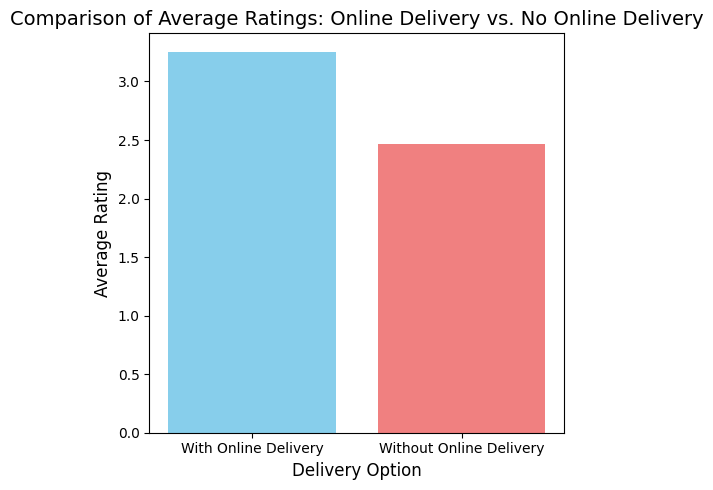

In [12]:
# Calculate the average rating for restaurants with online delivery
average_rating_with_delivery = df[df['Has Online delivery'] == True]['Aggregate rating'].mean()

# Step 3: Calculate the average rating for restaurants without online delivery
average_rating_without_delivery = df[df['Has Online delivery'] == False]['Aggregate rating'].mean()

# Step 4: Output the comparison
print(f"Average rating for restaurants with online delivery: {average_rating_with_delivery:.2f}")
print(f"Average rating for restaurants without online delivery: {average_rating_without_delivery:.2f}")

# Bar plot to compare the average ratings
labels = ['With Online Delivery', 'Without Online Delivery']
ratings = [average_rating_with_delivery, average_rating_without_delivery]

plt.figure(figsize=(5, 5))
plt.bar(labels, ratings, color=['skyblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Delivery Option', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.title('Comparison of Average Ratings: Online Delivery vs. No Online Delivery', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()
